In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

import the dataset.

In [3]:
def load_data(input_path):
    """Load CSV into pandas DataFrame"""
    df = pd.read_csv(input_path)
    return df

df = load_data('C:\\Users\\Shivam Tyagi\\ml_project\\Loan-Default-Prediction(Event-Based-PD)\\Data\\Loan_default.csv')


Basic Info and Overview

In [4]:

# Check dataset shape and basic info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (255347, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner  

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


Basic Dataset Summary

In [6]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [7]:
df.isna().mean()

LoanID            0.0
Age               0.0
Income            0.0
LoanAmount        0.0
CreditScore       0.0
MonthsEmployed    0.0
NumCreditLines    0.0
InterestRate      0.0
LoanTerm          0.0
DTIRatio          0.0
Education         0.0
EmploymentType    0.0
MaritalStatus     0.0
HasMortgage       0.0
HasDependents     0.0
LoanPurpose       0.0
HasCoSigner       0.0
Default           0.0
dtype: float64

Missing Value Analysis

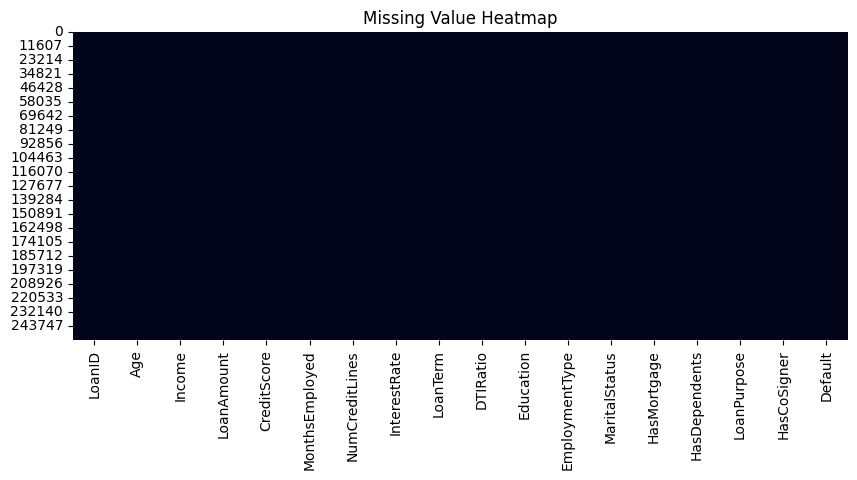

In [8]:
df.isnull().sum()

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

Numerical Features

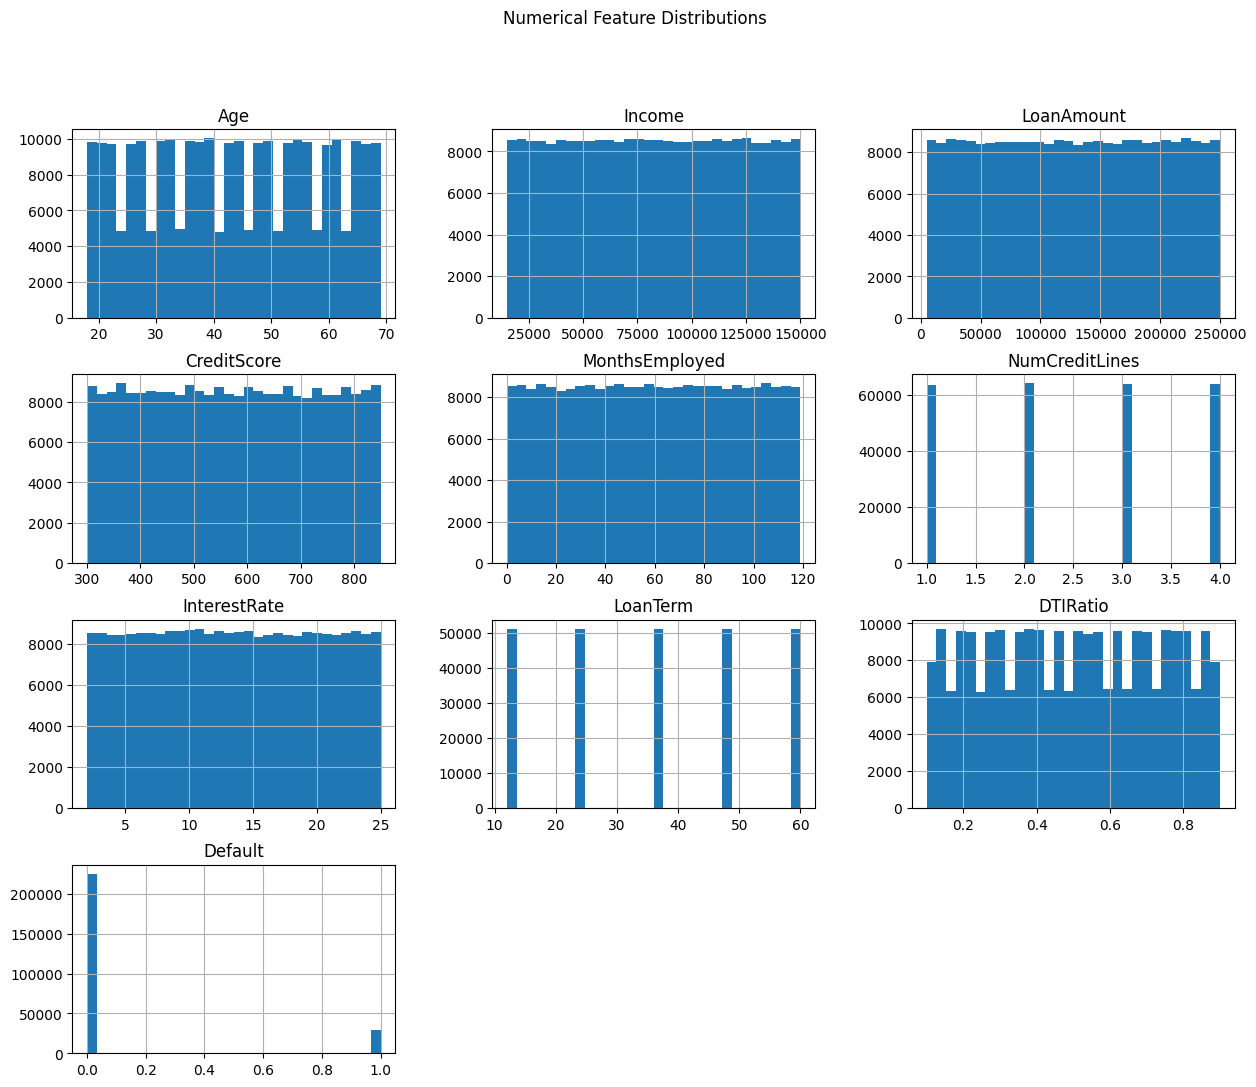

In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df[num_cols].hist(bins=30, figsize=(15,12))
plt.suptitle("Numerical Feature Distributions")
plt.show()

Exploratory Data Analysys (EDA)

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns = df.columns.str.lower().str.replace('.', '_')

In [11]:
df.columns

Index(['loanid', 'age', 'income', 'loanamount', 'creditscore',
       'monthsemployed', 'numcreditlines', 'interestrate', 'loanterm',
       'dtiratio', 'education', 'employmenttype', 'maritalstatus',
       'hasmortgage', 'hasdependents', 'loanpurpose', 'hascosigner',
       'default'],
      dtype='object')

In [12]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

categorical_columns

['loanid',
 'education',
 'employmenttype',
 'maritalstatus',
 'hasmortgage',
 'hasdependents',
 'loanpurpose',
 'hascosigner']

In [13]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [14]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

loanid
['i38pquqs96' 'hpsk72wa7r' 'c1oz6dpj8y' 'v2kksfm3un' 'ey08jdhtzp']
255347

age
[56 69 46 32 60]
52

income
[85994 50432 84208 31713 20437]
114620

loanamount
[ 50587 124440 129188  44799   9139]
158729

creditscore
[520 458 451 743 633]
550

monthsemployed
[80 15 26  0  8]
120

numcreditlines
[4 1 3 2]
4

interestrate
[15.23  4.81 21.17  7.07  6.51]
2301

loanterm
[36 60 24 48 12]
5

dtiratio
[0.44 0.68 0.31 0.23 0.73]
81

education
["bachelor's" "master's" 'high_school' 'phd']
4

employmenttype
['full-time' 'unemployed' 'self-employed' 'part-time']
4

maritalstatus
['divorced' 'married' 'single']
3

hasmortgage
['yes' 'no']
2

hasdependents
['yes' 'no']
2

loanpurpose
['other' 'auto' 'business' 'home' 'education']
5

hascosigner
['yes' 'no']
2

default
[0 1]
2



In [15]:
df['default'].value_counts(normalize=True)

default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

In [16]:
df['default'].value_counts(normalize=True)

default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

In [17]:
pd.crosstab(df['employmenttype'], df['default'], normalize='index')

default,0,1
employmenttype,,
full-time,0.905366,0.094634
part-time,0.880348,0.119652
self-employed,0.885380,0.114620
unemployed,0.864471,0.135529


ML Work 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
len(df_train), len(df_val), len(df_test)

(153207, 51070, 51070)

In [21]:
df.shape

(255347, 18)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

In [24]:
y_train

array([0, 0, 1, ..., 0, 0, 0], shape=(153207,))

In [25]:
df_full_train.isnull().sum()

loanid            0
age               0
income            0
loanamount        0
creditscore       0
monthsemployed    0
numcreditlines    0
interestrate      0
loanterm          0
dtiratio          0
education         0
employmenttype    0
maritalstatus     0
hasmortgage       0
hasdependents     0
loanpurpose       0
hascosigner       0
default           0
dtype: int64

In [26]:
df_full_train.default.value_counts(normalize=True)
# distribution of data

default
0    0.88378
1    0.11622
Name: proportion, dtype: float64

In [27]:
df_full_train.default.mean()

np.float64(0.11621964293581755)

#Numerical variables

In [28]:
num_features = df_full_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_features
num_features=num_features[:-1] # excluding target variable
num_features

['age',
 'income',
 'loanamount',
 'creditscore',
 'monthsemployed',
 'numcreditlines',
 'interestrate',
 'loanterm',
 'dtiratio']

#categorical variables

In [29]:

cat_features = df_full_train.select_dtypes(include=["object", "category"]).columns.tolist()

In [30]:
cat_features = [
 'education',
 'employmenttype',
 'maritalstatus',
 'hasmortgage',
 'hasdependents',
 'loanpurpose',
 'hascosigner']

In [31]:
df_full_train[cat_features].nunique()

education         4
employmenttype    4
maritalstatus     3
hasmortgage       2
hasdependents     2
loanpurpose       5
hascosigner       2
dtype: int64

In [32]:
global_churn = df_full_train.default.mean()
global_churn

np.float64(0.11621964293581755)


#exploring risk ratio

In [33]:

for c in cat_features:
    print(c)
    df_group = df_full_train.groupby(c).default.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

education


,mean,count,diff,risk
education,,,,
bachelor's,0.121257,51494,0.005037,1.043342
high_school,0.128739,51119,0.012519,1.107720
master's,0.108269,50901,-0.007951,0.931589
phd,0.106475,50763,-0.009744,0.916155




employmenttype


,mean,count,diff,risk
employmenttype,,,,
full-time,0.094769,50797,-0.021450,0.815433
part-time,0.119759,51303,0.003539,1.030455
self-employed,0.114086,51058,-0.002134,0.981641
unemployed,0.136114,51119,0.019894,1.171177




maritalstatus


,mean,count,diff,risk
maritalstatus,,,,
divorced,0.125409,68097,0.009190,1.079072
married,0.103676,68232,-0.012544,0.892067
single,0.119606,67948,0.003387,1.029139




hasmortgage


,mean,count,diff,risk
hasmortgage,,,,
no,0.123975,101996,0.007756,1.066734
yes,0.108485,102281,-0.007734,0.933452




hasdependents


,mean,count,diff,risk
hasdependents,,,,
no,0.127684,101947,0.011464,1.098644
yes,0.104798,102330,-0.011421,0.901725




loanpurpose


,mean,count,diff,risk
loanpurpose,,,,
auto,0.119920,40627,0.003701,1.031841
business,0.122843,40963,0.006623,1.056986
education,0.118568,40888,0.002348,1.020204
home,0.101908,41047,-0.014312,0.876853
other,0.117933,40752,0.001713,1.014741




hascosigner


,mean,count,diff,risk
hascosigner,,,,
no,0.128546,102127,0.012326,1.106059
yes,0.103896,102150,-0.012323,0.893964


In [34]:
from sklearn.metrics import mutual_info_score

def loan_default_prediction_score(series):
    return mutual_info_score(series, df_full_train.default)

In [35]:
mi = df_full_train[cat_features].apply(loan_default_prediction_score)
mi.sort_values(ascending=False)

employmenttype    0.001071
hascosigner       0.000741
hasdependents     0.000638
maritalstatus     0.000417
education         0.000412
hasmortgage       0.000292
loanpurpose       0.000271
dtype: float64

In [36]:
df_full_train[num_features].corrwith(df_full_train.default).abs()

age               0.165945
income            0.098768
loanamount        0.087956
creditscore       0.034033
monthsemployed    0.096895
numcreditlines    0.028303
interestrate      0.131149
loanterm          0.000269
dtiratio          0.018407
dtype: float64

In [37]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[num_features + cat_features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)


In [38]:
val_dict = df_val[num_features + cat_features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [39]:
X_val[:1]

array([[3.70000e+01, 6.51000e+02, 1.70000e-01, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.31140e+05, 3.58000e+00, 1.78681e+05,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        6.00000e+01, 1.00000e+00, 0.00000e+00, 0.00000e+00, 6.60000e+01,
        1.00000e+00]])

In [40]:
train_dict[:1]

[{'age': 42,
  'income': 69152,
  'loanamount': 153082,
  'creditscore': 694,
  'monthsemployed': 6,
  'numcreditlines': 4,
  'interestrate': 6.72,
  'loanterm': 48,
  'dtiratio': 0.11,
  'education': 'phd',
  'employmenttype': 'part-time',
  'maritalstatus': 'single',
  'hasmortgage': 'yes',
  'hasdependents': 'yes',
  'loanpurpose': 'home',
  'hascosigner': 'no'}]

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs',max_iter=500,C=1.0)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitlyb
model.fit(X_train, y_train)

c:\Users\Shivam Tyagi\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [42]:
model.intercept_[0]

np.float64(-0.019689345919359266)

In [43]:
model.coef_[0].round(3)

array([-0.043, -0.001,  0.016,  0.022,  0.058, -0.045, -0.054, -0.112,
        0.013, -0.012,  0.091,  0.111, -0.13 ,  0.095, -0.115,  0.064,
       -0.083, -0.   ,  0.063,  0.   ,  0.005,  0.026,  0.001, -0.056,
        0.004, -0.002,  0.05 , -0.085,  0.015, -0.01 ,  0.151])

In [44]:
y_pred = model.predict_proba(X_val)[:, 1]

In [45]:
y_pred

array([0.02801973, 0.35700497, 0.06198499, ..., 0.20525744, 0.02049449,
       0.11667475], shape=(51070,))

In [46]:
campaign_call = (y_pred >= 0.5)

In [47]:
campaign_call

array([False, False, False, ..., False, False, False], shape=(51070,))

In [48]:
(y_val == campaign_call).mean()

np.float64(0.8849030742118661)

In [49]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = campaign_call.astype(int)
df_pred['actual'] = y_val

In [50]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [51]:
df_pred.correct.mean()

np.float64(0.8849030742118661)

In [52]:
#limited numerical columns

small_numeric = ['age', 'income', 'loanamount',
                 'creditscore','monthsemployed',
                'numcreditlines','interestrate','loanterm','dtiratio']

In [53]:
df_train

,loanid,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner
0,u0owcuuzqq,42,69152,153082,694,6,4,6.72,48,0.11,phd,part-time,single,yes,yes,home,no
1,ack8u50xb4,64,94739,27266,421,34,3,22.86,36,0.75,master's,self-employed,single,no,yes,home,yes
2,qbo0dhw23k,20,46956,201113,314,9,3,6.28,60,0.33,high_school,self-employed,married,no,yes,home,no
3,qvr6n674ry,27,24170,67283,425,76,2,7.87,48,0.70,high_school,self-employed,divorced,no,no,auto,no
4,27jjodxjcb,60,89306,231407,730,114,4,20.39,12,0.60,master's,full-time,single,no,yes,other,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153202,invpzbrrna,33,58958,53763,756,102,1,22.83,12,0.13,master's,part-time,divorced,no,yes,business,no
153203,pmqxcliial,24,140739,73073,544,24,1,9.16,60,0.78,phd,self-employed,divorced,no,yes,auto,yes
153204,k0rl3zrsvh,29,122671,199228,663,89,3,10.10,60,0.17,phd,part-time,divorced,yes,yes,other,yes
153205,mrfzsiq2t3,18,115282,142016,601,50,3,3.43,36,0.36,master's,unemployed,divorced,no,no,business,yes


In [54]:
df_train[small_numeric + cat_features].iloc[:10].to_dict(orient='records')

[{'age': 42,
  'income': 69152,
  'loanamount': 153082,
  'creditscore': 694,
  'monthsemployed': 6,
  'numcreditlines': 4,
  'interestrate': 6.72,
  'loanterm': 48,
  'dtiratio': 0.11,
  'education': 'phd',
  'employmenttype': 'part-time',
  'maritalstatus': 'single',
  'hasmortgage': 'yes',
  'hasdependents': 'yes',
  'loanpurpose': 'home',
  'hascosigner': 'no'},
 {'age': 64,
  'income': 94739,
  'loanamount': 27266,
  'creditscore': 421,
  'monthsemployed': 34,
  'numcreditlines': 3,
  'interestrate': 22.86,
  'loanterm': 36,
  'dtiratio': 0.75,
  'education': "master's",
  'employmenttype': 'self-employed',
  'maritalstatus': 'single',
  'hasmortgage': 'no',
  'hasdependents': 'yes',
  'loanpurpose': 'home',
  'hascosigner': 'yes'},
 {'age': 20,
  'income': 46956,
  'loanamount': 201113,
  'creditscore': 314,
  'monthsemployed': 9,
  'numcreditlines': 3,
  'interestrate': 6.28,
  'loanterm': 60,
  'dtiratio': 0.33,
  'education': 'high_school',
  'employmenttype': 'self-employed',

In [55]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[cat_features + num_features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df[cat_features + num_features].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [56]:
C = 1.0
n_splits = 5


kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.default.values
    y_val = df_val.default.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

c:\Users\Shivam Tyagi\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shivam Tyagi\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:

C=1.0 0.743 +- 0.002


In [57]:
scores

[0.741711575260571,
 0.7411137354148396,
 0.7414037479974944,
 0.7442344064399569,
 0.7468740064155024]

In [58]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [59]:
dv, model = train(df_full_train, df_full_train.default.values, C=1.0)
y_pred = predict(df_test, dv, model)

y_test = df_test.default.values
auc = roc_auc_score(y_test, y_pred)
auc

c:\Users\Shivam Tyagi\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7473448547607405

Packaging of model into pickle format


In [60]:
import pickle
output_file = f'model_C={C}.bin'

In [61]:
f_out = open(output_file, 'wb') 
pickle.dump((dv, model), f_out)
f_out.close()

In [62]:
with open(output_file, 'wb') as f_out: 
    pickle.dump((dv, model), f_out)

In [63]:
input_file = 'model_C=1.0.bin'

with open(input_file, 'rb') as f_in: 
    dv, model = pickle.load(f_in)

In [64]:
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [65]:
customer = {
    'LoanID': 'I38PQUQS96',
    'Age': 56,
    'Income': 85994,
    'LoanAmount': 50587,
    'CreditScore': 520,
    'MonthsEmployed': 80,
    'NumCreditLines': 4,
    'InterestRate': 15.23,
    'LoanTerm': 36,
    'DTIRatio': 0.44,
    'Education': "Bachelor's",
    'EmploymentType': 'Full-time',
    'MaritalStatus': 'Divorced',
    'HasMortgage': 'Yes',
    'HasDependents': 'Yes',
    'LoanPurpose': 'Other',
    'HasCoSigner': 'Yes'
}

In [66]:
X = dv.transform([customer])
y_pred = model.predict_proba(X)[0, 1]
print('input:', customer)
prediction=(y_pred>=0.5)
print('output:', prediction,y_pred )

input: {'LoanID': 'I38PQUQS96', 'Age': 56, 'Income': 85994, 'LoanAmount': 50587, 'CreditScore': 520, 'MonthsEmployed': 80, 'NumCreditLines': 4, 'InterestRate': 15.23, 'LoanTerm': 36, 'DTIRatio': 0.44, 'Education': "Bachelor's", 'EmploymentType': 'Full-time', 'MaritalStatus': 'Divorced', 'HasMortgage': 'Yes', 'HasDependents': 'Yes', 'LoanPurpose': 'Other', 'HasCoSigner': 'Yes'}
output: False 0.49414622151296705


In [67]:
pwd

'c:\\Users\\Shivam Tyagi\\ml_project\\Loan-Default-Prediction(Event-Based-PD)\\Notebook'

In [68]:
from sklearn.preprocessing import LabelEncoder

# Encode target column
df=pd.read_csv("../Data/Loan_default.csv", sep=',')

df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [69]:

# Auto encode categorical features
df.iloc[:1]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


In [70]:
df_encoded = df.copy()
for col in df.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

In [71]:
df_encoded.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,128027,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,125442,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,85333,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,220129,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,105746,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


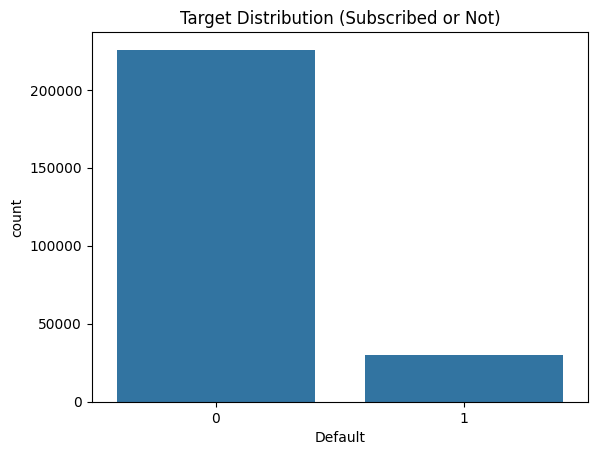

In [72]:

# Plot target balance
sns.countplot(x='Default', data=df)
plt.title('Target Distribution (Subscribed or Not)')
plt.show()

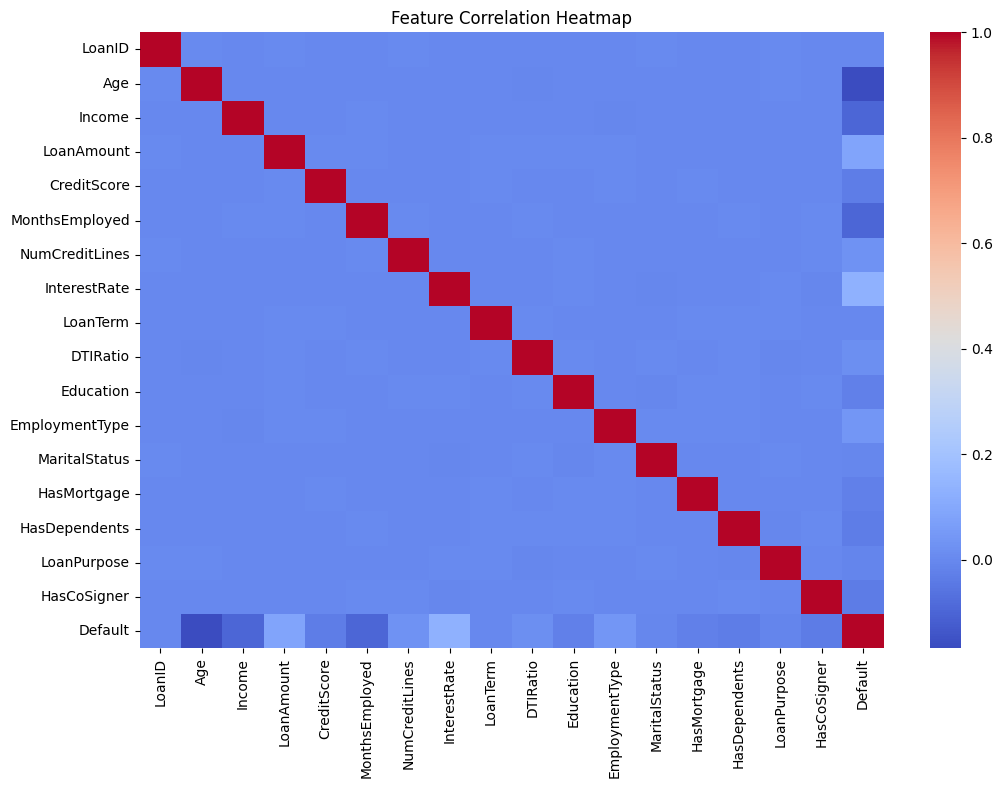

In [73]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [74]:
X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Train Decision Tree and Random Forest, evaluate and save best model

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import pickle
import numpy as np
from sklearn.feature_extraction import DictVectorizer

# --- changed code: ensure features exist in dataframe and are lists ----------
# original lists (may have been modified earlier)
# cat_features = [...]
# num_features = [...]

# coerce num_features to plain list (if it's an Index)
num_features = list(num_features)

# build features list from actual df_full_train columns (avoid missing columns)
requested_features = cat_features + num_features
features = [f for f in requested_features if f in df_full_train.columns]

# sanity checks / logging
print("requested_features count:", len(requested_features))
print("using features count:", len(features))
print("missing features:", sorted(set(requested_features) - set(features)))

# minimal guard
if len(features) == 0:
    raise RuntimeError("No features found in df_full_train. Check cat_features / num_features names.")

# prepare vectorizer on full training data
train_dicts = df_full_train[features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
y_train = df_full_train.default.values

# prepare test set
test_dicts = df_test[features].to_dict(orient='records')
X_test = dv.transform(test_dicts)
y_test = df_test.default.values

# instantiate models
dt = DecisionTreeClassifier(random_state=1, max_depth=6)
rf = RandomForestClassifier(n_estimators=200, random_state=1, n_jobs=-1)

# train
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# predict probabilities
y_pred_dt = dt.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict_proba(X_test)[:, 1]

# metrics
def summarize(name, y_true, y_prob):
    auc = roc_auc_score(y_true, y_prob)
    y_pred = (y_prob >= 0.5).astype(int)
    acc = accuracy_score(y_true, y_pred)
    print(f"{name} - AUC: {auc:.4f} | Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred, digits=4))
    return auc

auc_dt = summarize("DecisionTree", y_test, y_pred_dt)
auc_rf = summarize("RandomForest", y_test, y_pred_rf)

# feature importances
try:
    feature_names = dv.get_feature_names_out()
except:
    feature_names = dv.get_feature_names()

def print_top_importances(model, name, top_n=20):
    imp = model.feature_importances_
    idx = np.argsort(imp)[::-1][:top_n]
    print(f"\nTop {top_n} importances for {name}:")
    for i in idx:
        print(f"{feature_names[i]}: {imp[i]:.4f}")

print_top_importances(dt, "DecisionTree", top_n=15)
print_top_importances(rf, "RandomForest", top_n=20)

# save the best model (choose by AUC)
if auc_rf >= auc_dt:
    best = ("rf", rf, auc_rf)
else:
    best = ("dt", dt, auc_dt)

output_file = f"model_best_{best[0]}.bin"

with open(output_file, "wb") as f_out:
    pickle.dump((dv, best[1], features), f_out)

print(f"\nSaved best model to {output_file} (AUC={best[2]:.4f})")

requested_features count: 16
using features count: 16
missing features: []
DecisionTree - AUC: 0.7218 | Accuracy: 0.8859
              precision    recall  f1-score   support

           0     0.8881    0.9966    0.9392     45158
           1     0.6086    0.0408    0.0764      5912

    accuracy                         0.8859     51070
   macro avg     0.7483    0.5187    0.5078     51070
weighted avg     0.8557    0.8859    0.8393     51070

RandomForest - AUC: 0.7367 | Accuracy: 0.8862
              precision    recall  f1-score   support

           0     0.8873    0.9982    0.9395     45158
           1     0.6917    0.0311    0.0596      5912

    accuracy                         0.8862     51070
   macro avg     0.7895    0.5147    0.4995     51070
weighted avg     0.8646    0.8862    0.8376     51070


Top 15 importances for DecisionTree:
age: 0.3183
interestrate: 0.2249
income: 0.2059
loanamount: 0.1519
monthsemployed: 0.0989
numcreditlines: 0.0000
maritalstatus=married: 0.000